### Student Information
Name: Teepawin Mueanpetch

Student ID: 112006229

GitHub ID: https://github.com/Teepawin

---

### Instructions

### First Phase Submission

1. First: do the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) that considered as **phase 1 (from exercise 1 to exercise 15)**. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: follow the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** up **until phase 1**. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    -  Use [the new dataset](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/newdataset/Reddit-stock-sentiment.csv). The dataset contains a 16 columns including 'text' and 'label', with the sentiment labels being: 1.0 is positive, 0.0 is neutral and -1.0 is negative. You can simplify the dataset and use only the columns that you think are necessary. 
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.
    - Use this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 10% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    


4. Fourth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__

You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (September 28th 11:59 pm, Sunday)__. 

### Second Phase Submission 

**You can keep the answer for phase 1 for easier running and update the phase 2 on the same page.**

1. First: Continue doing the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) for **phase 2, starting from Finding frequent patterns**. Use the same master(.ipynb) file. Answer from phase 1 will not be considered at this stage. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: Continue from first phase and do the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** for phase 2, starting from Finding frequent pattern. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    - Continue using this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output. Use the same new dataset as in phase 1.
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.

3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 20% of your grade.__
    - Use this file to answer.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency).  Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences and when using augmentation with feature pattern.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__


You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 19th 11:59 pm, Sunday)__. 

# Phase 1

In [66]:
### Begin Assignment Here
import pandas as pd
import numpy as np
import nltk
nltk.download('punkt') # download the NLTK datasets
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
import plotly as py
import math
import seaborn as sns
import matplotlib.pyplot as plt
import helpers.data_mining_helpers as dmh

#Get the newdataset
df = pd.read_csv("newdataset/Reddit-stock-sentiment.csv")

#Exercise 1
for i in range(3):
    print(f"Example {i+1}")
    print("\n".join(df.text[i].split("\n")))

Example 1
Calls on retards
Example 2
Stunt as in like why did they even make a big deal about starting it in the first place? No company should ever talk about politics ever.
Example 3
Seeing lots of red in the ticker.


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\USER5\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [67]:
#Exercise 2
df.get(["text","label"])

#Check size and head
#print(df.shape)
#print(df.head())

#Drop some column that is not significant to our target
feature_deletion = ["datetime","post_id","url","author"]

df = df.drop(feature_deletion,axis=1)

#Exercise 3
df[df["label"]==1.0][::10][0:5]

,type,subreddit,title,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
3,post,stockstobuytoday,Who knows more? $VMAR,30,0.0,0.98,Vision Marine Technologies Inc. is rewriting t...,0.646970,0.216383,1.0,"['watercraft', 'skill', 'power', ']', 'feat', ...",1.0
78,comment,StockMarket,$ U.S. dollar value (crashing),1,NaN,NaN,I think it’s gonna work itself out. I bought t...,0.133333,-0.133333,-1.0,"['trading', 'app', 'gloom', 'doom', 'gon']",1.0
168,comment,stocks,r/Stocks Daily Discussion & Fundamentals Frida...,1,NaN,NaN,The obvious can also be refreshing from CNBC: ...,0.750000,0.250000,1.0,"['bond', 'U.S', 'dollar', '’', 'Fed', 'CNBC', ...",1.0
219,comment,stockstobuytoday,APLS stocks,1,NaN,NaN,Same. Back to break even after that last rip b...,0.300000,0.144444,1.0,"['rip', 'Same', 'Back', '%', 'thing']",1.0
319,comment,stocks,"It's fucking awful seeing the ""Silver"" misinfo...",1,NaN,NaN,Etrade has a feed of news articles about how r...,0.000000,0.000000,0.0,"['news', 'actual-reddit', 'reddit', 'GME', 'Et...",1.0


                                 type                           subreddit  \
0  The amoung of missing records is:   The amoung of missing records is:    
1                                   0                                   0   

                                title                             upvotes  \
0  The amoung of missing records is:   The amoung of missing records is:    
1                                   0                                   0   

                            downvotes                        upvote_ratio  \
0  The amoung of missing records is:   The amoung of missing records is:    
1                                 783                                 783   

                                 text                        subjectivity  \
0  The amoung of missing records is:   The amoung of missing records is:    
1                                   0                                   0   

                             polarity                           sentimen

<Axes: title={'center': 'Sentiment distribution'}, xlabel='sentiment_label'>

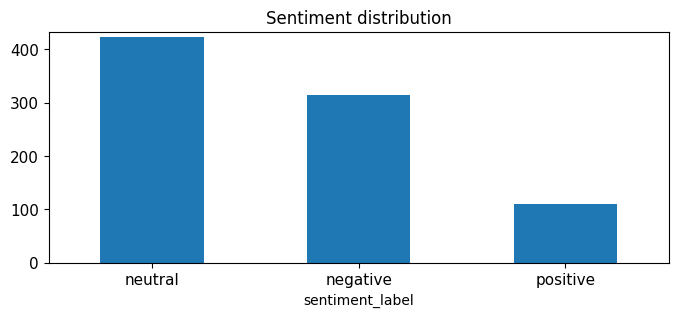

In [91]:
#Create new column for classification (postive neutral negative)
def format_labels(target):
    if target==1.0:
        return "positive"
    elif target==0:
        return "neutral"
    elif target==-1.0:
        return "negative"        

df['sentiment_label'] = df.label.apply(format_labels)

#Exercise 4
print(df.isnull().apply(lambda x: dmh.check_missing_values(x)))

#Drop row that have null value
df_dropna = df.dropna()

#Exercise 6 & 7
#Plot Semtiment label distrubution
df.sentiment_label.value_counts().plot(kind = 'bar',
                                    title = 'Sentiment distribution',
                                    ylim = [0, df.sentiment.value_counts().max()+10],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

<Axes: title={'center': 'Category distribution'}, xlabel='sentiment_label'>

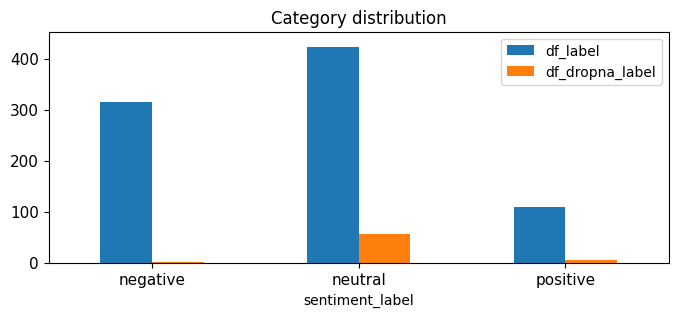

In [93]:
#Exercise 8
df_compare = pd.DataFrame({
    'df_label': df.sentiment_label.value_counts(),
    'df_dropna_label': df_dropna.sentiment_label.value_counts()
})

df_compare.plot(kind = 'bar',
                title = 'Category distribution',
                ylim = [0, df.sentiment_label.value_counts().max()+30],        
                rot = 0, fontsize = 11, figsize = (8,3))

In [ ]:
#text tokenizer
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
df_counts = count_vect.fit_transform(df.text) #learn the vocabulary and return document-term matrix

#Exercise 9
analyze = count_vect.build_analyzer()
analyze(df.text[0])

['calls', 'on', 'retards']

000
100
125
17th


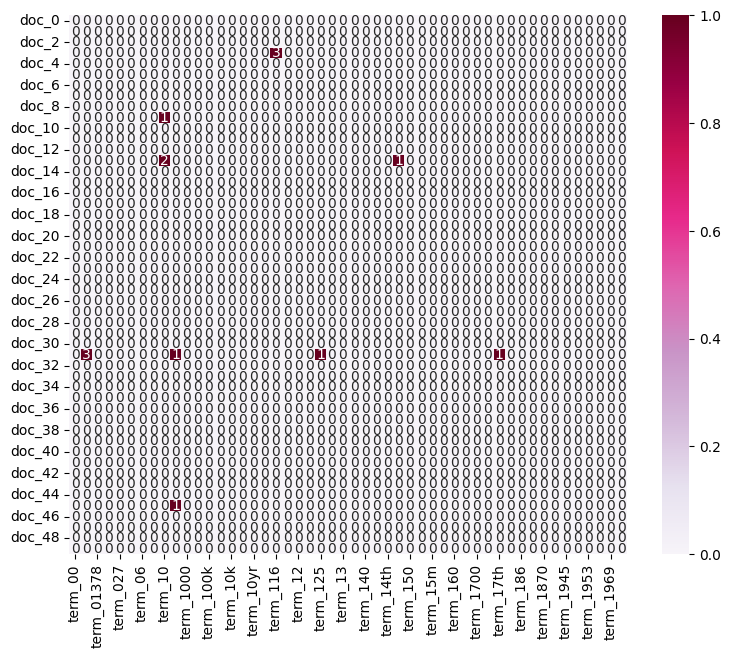

In [81]:
#text tokenizer
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
df_counts = count_vect.fit_transform(df.text) #learn the vocabulary and return document-term matrix
#print(df_counts[0])
#print(df_counts.shape)

plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:50]]

plot_y = ["doc_"+ str(i) for i in list(df.index)[0:50]]

plot_z = df_counts[0:50, 0:50].toarray()

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)


#Exercise 10 search for doc_31
nonzero_cols = np.where(df_counts[31,0:50].toarray()>=1)[1]

for i in nonzero_cols:
    print(count_vect.get_feature_names_out()[i])

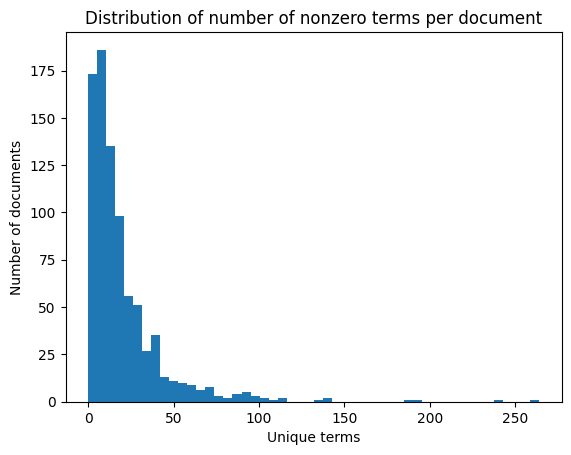

In [87]:
#Exercise 11
df_density = (df_counts > 0).sum(axis=1).A1  # nonzeros per doc
plt.hist(df_density, bins=50)
plt.title("Distribution of number of nonzero terms per document")
plt.xlabel("Unique terms")
plt.ylabel("Number of documents")
plt.show()

In [ ]:
#Exercise 12
# Answer here
import plotly.express as px

term_frequencies = np.asarray(df_counts.sum(axis=0))[0]

# Create interactive bar plot
fig = px.bar(
    x=count_vect.get_feature_names_out()[:300],
    y=term_frequencies[:300],
    labels={'x': 'Terms', 'y': 'Frequency'},
    title="Top 300 Term Frequencies",
)

# Rotate x-axis labels for readability
fig.update_layout(
    xaxis=dict(tickangle=90),
    width=1200,  # make wide
    height=600
)

fig.show()

In [88]:
#Exercise 13
# Set min freq.
min_freq = 10
mask = term_frequencies >= min_freq


# Create interactive bar plot
fig = px.bar(
    x=count_vect.get_feature_names_out()[mask],
    y=term_frequencies[mask],
    labels={'x': 'Terms', 'y': 'Frequency'},
    title="Top 10 Term Frequencies",
)

# Rotate x-axis labels for readability
fig.update_layout(
    xaxis=dict(tickangle=90),
    width=1200,  # make wide
    height=600
)

In [89]:
#Exercise 14
#Selecting top 100 frequencies
N = 100
top_indices = np.argsort(term_frequencies)[::-1][:N]   

# Create interactive bar plot
fig = px.bar(
    x=count_vect.get_feature_names_out()[top_indices],
    y=term_frequencies[top_indices],
    labels={'x': 'Terms', 'y': 'Frequency'},
    title="Top 300 Term Frequencies",
)

# Rotate x-axis labels for readability
fig.update_layout(
    xaxis=dict(tickangle=90),
    width=1200,  # make wide
    height=600
)

In [90]:
#Exercise 15
term_frequencies_log = [math.log(i) for i in term_frequencies]
#Selecting top 100 frequencies
N = 100
top_indices_log = np.argsort(term_frequencies_log)[::-1][:N]   
term_frequencies_log_temp = np.array(term_frequencies_log)
# Create interactive bar plot
fig = px.bar(
    x=count_vect.get_feature_names_out()[top_indices_log],
    y=term_frequencies_log_temp[top_indices_log],
    labels={'x': 'Terms', 'y': 'Frequency'},
    title="Top 300 Term Frequencies",
)

# Rotate x-axis labels for readability
fig.update_layout(
    xaxis=dict(tickangle=90),
    width=1200,  # make wide
    height=600
)


# Phase 2

In [48]:
### Begin Assignment Here